# DS_C8_S5

# Refining Computer Sales Strategy through Statistical Analysis

In Project-Part 1, computers data will be prepared for further analysis by performing data pre- processing and cleaning, if required. Three business objectives will be resolved by solving various business questions using Python. These include enhancing product strategy and sales performance through specification-based analysis, assessing price disparities between premium and non-premium computers, understanding computer price trends.


In [1]:
import pandas as pd
# Step 1: Load the data (if not already in DataFrame)
data = pd.read_csv('DS1_C8_S5_Computers_Data_Project.csv')

# Step 2: Impute missing values (if any)
# For categorical columns, we impute with the mode (most frequent value)
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0])

# Step 3: Drop duplicates
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6259 non-null   int64 
 1   price     6259 non-null   int64 
 2   speed     6259 non-null   int64 
 3   hd        6259 non-null   int64 
 4   ram       6259 non-null   int64 
 5   screen    6259 non-null   int64 
 6   cd        6259 non-null   object
 7   multi     6259 non-null   object
 8   premium   6259 non-null   object
 9   ads_2022  6259 non-null   int64 
 10  ads_2023  6259 non-null   int64 
 11  trend     6259 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 586.9+ KB


# Task 1

#### a) Analyze Purchase Likelihood Based on Specifications
- The company wants to understand the likelihood of customers purchasing specific computer configurations based on a combination of desired features (RAM size, processor speed, size of the computer screen).
- What is the probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz?


In [2]:
# Strp 1: N=Total number of rows in the dataset
total_entries = len(data)
print('N:',total_entries)

N: 6259


In [11]:
# Step 2: Filter rows based on the specified conditions
filtered_data = data[(data['ram'] >= 8) & (data['screen'] == 14) & (data['speed'] > 33)]

# Calculate the number of matching entries
matching_entries = len(filtered_data)

In [15]:
# Step 3: We calculate the likelihood P of purchasing based on the matching entries and total entries: 
# Calculate the likelihood 
# P=M/N
likelihood = matching_entries / total_entries

total_entries, matching_entries, likelihood

(6259, 1003, 0.16024924109282632)

#### b) Probability of Selling Premium Computers
- What is the probability of selling a premium computer?
- Given that a computer is premium, what is the probability that it has a CD player?

In [18]:
# Step 1: Count the number of premium computers
premium_computers = data[data['premium'] == 'yes']

# Step 2: Calculate the probability of selling a premium computer
probability_premium = len(premium_computers) / total_entries

# Step 3: Count the number of premium computers with a CD player
premium_with_cd = premium_computers[premium_computers['cd'] == 'yes']

# Step 4: Calculate the conditional probability of having a CD player given the computer is premium
probability_cd_given_premium = len(premium_with_cd) / len(premium_computers)

probability_premium, probability_cd_given_premium

(0.9022208020450552, 0.5000885425889853)

#### c) Predicting the Probability of Certain Specifications
- What is the probability of a computer having a screen size greater than 15 inches and being premium?
- Given that a computer is not premium, what is the probability that it has a screen size less than or equal to 14 inches?

In [21]:
# Step 1: Filter premium computers with screen size > 15 inches
premium_with_large_screen = data[(data['premium'] == 'yes') & (data['screen'] > 15)]

# Step 2: Calculate the probability
probability_large_screen_and_premium = len(premium_with_large_screen) / total_entries
probability_large_screen_and_premium

0.08467806358843266

In [24]:
# Step 1: Filter non-premium computers with screen size <= 14 inches
non_premium_with_small_screen = data[(data['premium'] == 'no') & (data['screen'] <= 14)]

# Step 2: Calculate the number of non-premium computers
non_premium_computers = data[data['premium'] == 'no']

# Step 3: Calculate the conditional probability
probability_small_screen_given_not_premium = len(non_premium_with_small_screen) / len(non_premium_computers)
probability_small_screen_given_not_premium

0.6911764705882353

#### d) Likelihood of computers having both a CD player and a multimedia kit
- What is the joint probability of computers having both a CD player and a multimedia kit?
- Given that a computer has a CD player, what is the probability that it also has a multimedia kit?

In [27]:
# Step 1: Filter computers with both CD and multimedia kit
cd_and_multimedia = data[(data['cd'] == 'yes') & (data['multi'] == 'yes')]

# Step 2: Calculate the joint probability
joint_probability = len(cd_and_multimedia) / total_entries
joint_probability

0.1394791500239655

In [31]:
# Step 1: Filter computers with a CD player
cd_computers = data[data['cd'] == 'yes']

# Step 2: Calculate the conditional probability
conditional_probability = len(cd_and_multimedia) / len(cd_computers)
conditional_probability

0.3002063273727648

# Task 2
#### a) What is the average price of computers in the population/whole data?

In [32]:
# Calculate the average price of computers in the whole dataset
average_price = data['price'].mean()
average_price

2219.576609682058

#### b) How does the average price of samples vary when data is sampled using different sampling techniques?

In [41]:
# Stratified Sampling (10% stratified by 'premium')
stratified_sample = data.groupby('premium')
average_price_stratified = stratified_sample['price'].mean()

average_price_simple_random, average_price_stratified

(2237.94089456869,
 premium
 no     2361.934641
 yes    2204.148397
 Name: price, dtype: float64)

#### c) What is the average price of premium and non-premium computers in the whole data? How does the average price differ between premium and non-premium computers of sampled data using simple random sampling without replacement?

In [42]:
# Whole data: Calculate average prices for premium and non-premium computers
average_price_premium = data[data['premium'] == 'yes']['price'].mean()
average_price_non_premium = data[data['premium'] == 'no']['price'].mean()

# Sampled data: Simple Random Sampling
average_price_premium_sample = simple_random_sample[simple_random_sample['premium'] == 'yes']['price'].mean()
average_price_non_premium_sample = simple_random_sample[simple_random_sample['premium'] == 'no']['price'].mean()

average_price_premium, average_price_non_premium, average_price_premium_sample, average_price_non_premium_sample

(2204.148397379139, 2361.9346405228757, 2234.4072790294626, 2279.5510204081634)

#### d) Write your interpretation by comparing prices of premium and non-premium computers individually and prices of both categories together.

Premium Computers:
- Whole data: 2204.14
- Sampled data: 2234.41
- The average price of premium computers in the sampled data is slightly higher than in the whole data.

Non-Premium Computers:
- Whole data: 2361.93
- Sampled data: 2279.55
- The average price of non-premium computers in the sampled data is lower than in the whole data.


# Task 3
#### a) How does the distribution of sample means change for computer prices with different sample sizes?

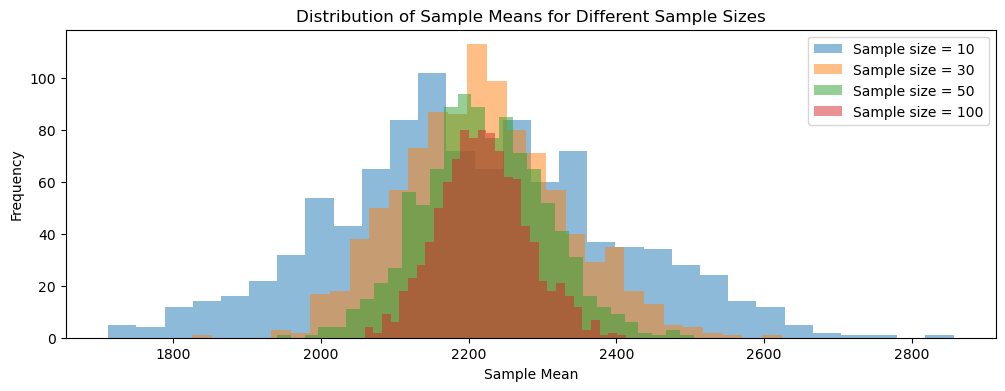

In [45]:
import matplotlib.pyplot as plt
import numpy as np

sample_sizes = [10, 30, 50, 100] # Define sample sizes and number of repetitions
num_samples = 1000  # Number of samples to draw for each size
sample_means = {}
for size in sample_sizes:
    means = [data['price'].sample(n=size, replace=True).mean() for _ in range(num_samples)]
    sample_means[size] = means

plt.figure(figsize=(12, 4))
for size, means in sample_means.items():
    plt.hist(means, bins=30, alpha=0.5, label=f"Sample size = {size}")

plt.title("Distribution of Sample Means for Different Sample Sizes")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### b) Does the distribution of sample means approximate a normal distribution as sample size increases?

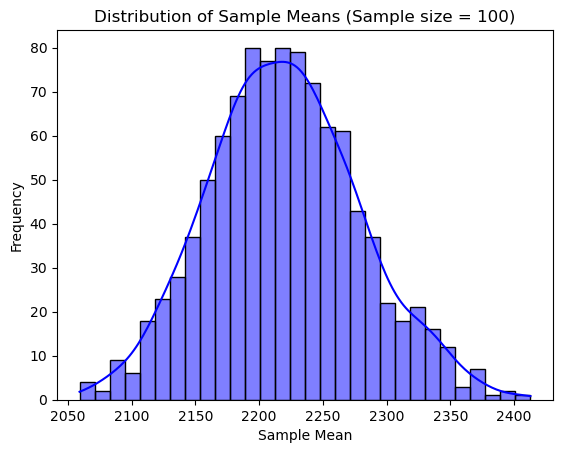

Sample means approximate a normal distribution (p-value = 0.050).


In [49]:
import seaborn as sns
from scipy.stats import normaltest

largest_sample_size = max(sample_sizes)
sns.histplot(sample_means[largest_sample_size], kde=True, bins=30, color='blue')
plt.title(f"Distribution of Sample Means (Sample size = {largest_sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

stat, p_value = normaltest(sample_means[largest_sample_size])
if p_value > 0.05:
    print(f"Sample means approximate a normal distribution (p-value = {p_value:.3f}).")
else:
    print(f"Sample means do not approximate a normal distribution (p-value = {p_value:.3f}).")

#### c) Check if properties of Central limit theorem for the samples is satisfied.

In [52]:
# Population mean and variance
population_mean = data['price'].mean()
population_variance = data['price'].var()

# Verify properties of CLT
for size in sample_sizes:
    sample_mean = np.mean(sample_means[size])
    sample_variance = np.var(sample_means[size])
    theoretical_variance = population_variance / size
    print(f"Sample size = {size}")
    print(f"Mean of sample means = {sample_mean:.2f}, Population mean = {population_mean:.2f}")
    print(f"Variance of sample means = {sample_variance:.2f}, Theoretical variance = {theoretical_variance:.2f}")
    print()

Sample size = 10
Mean of sample means = 2206.43, Population mean = 2219.58
Variance of sample means = 34699.26, Theoretical variance = 33733.32

Sample size = 30
Mean of sample means = 2217.16, Population mean = 2219.58
Variance of sample means = 11915.02, Theoretical variance = 11244.44

Sample size = 50
Mean of sample means = 2219.99, Population mean = 2219.58
Variance of sample means = 6907.28, Theoretical variance = 6746.66

Sample size = 100
Mean of sample means = 2219.73, Population mean = 2219.58
Variance of sample means = 3510.23, Theoretical variance = 3373.33

